In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from tpot import TPOTClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [4]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\alzahimar\dataset\alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.93,0,13.30,6.33,1.35,...,0,0,1.73,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.83,0,4.54,7.62,0.52,...,0,0,2.59,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.80,0,19.56,7.84,1.83,...,0,0,7.12,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.80,1,12.21,8.43,7.44,...,0,1,6.48,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.72,0,18.45,6.31,0.80,...,0,0,0.01,0,0,1,1,0,0,XXXConfid


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [371]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [372]:
df.shape

(2149, 35)

In [373]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [374]:
df.duplicated().sum()

0

In [375]:
df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

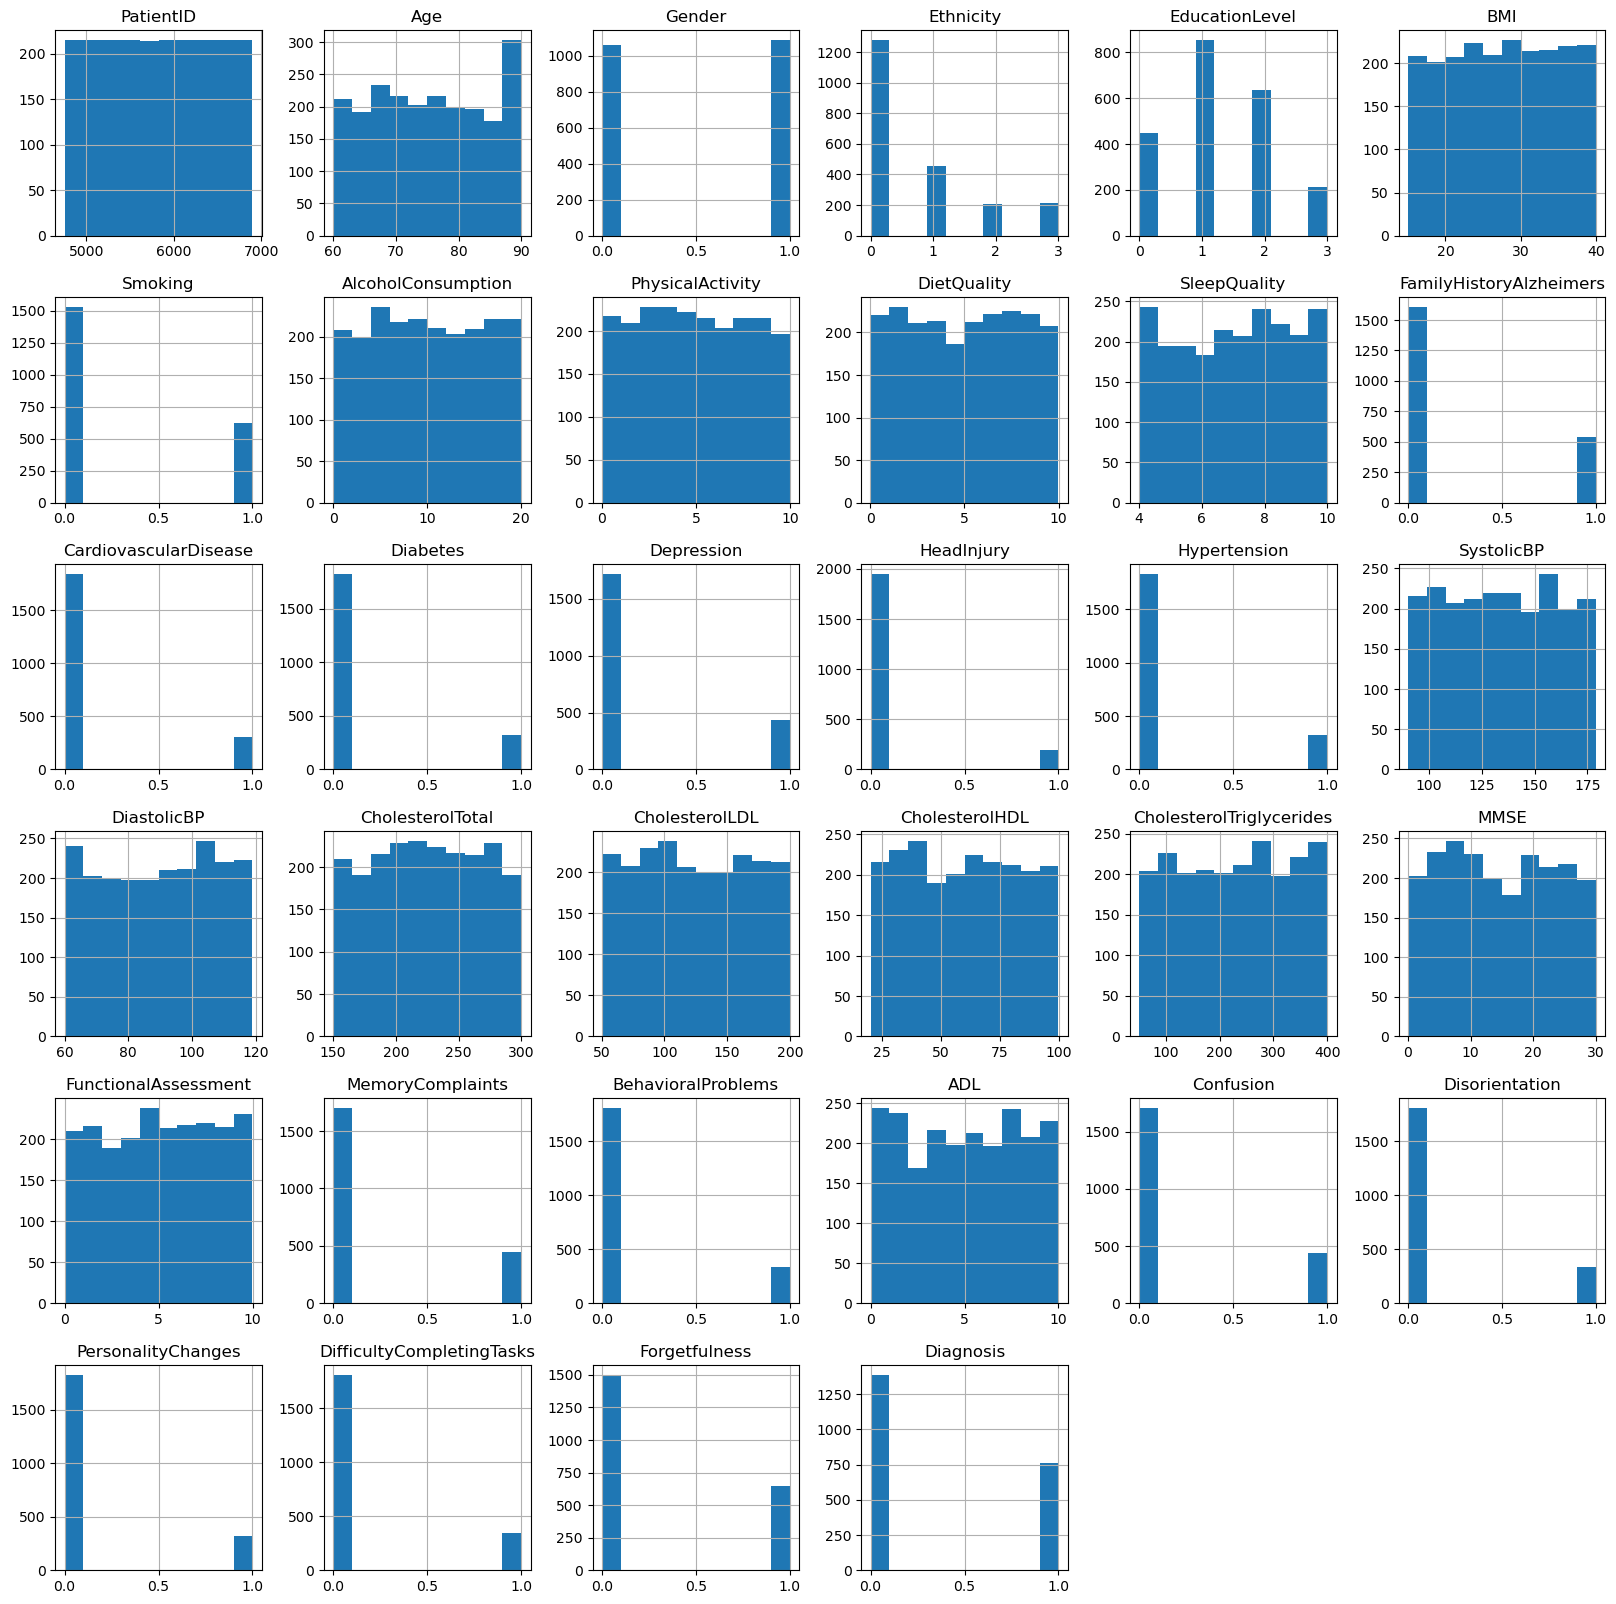

In [376]:
df.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='Depression'>

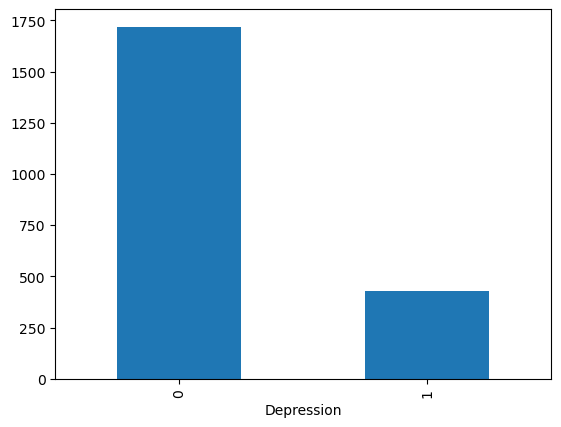

In [4]:
df.Depression.value_counts().plot(kind='bar')

<Axes: xlabel='Diagnosis'>

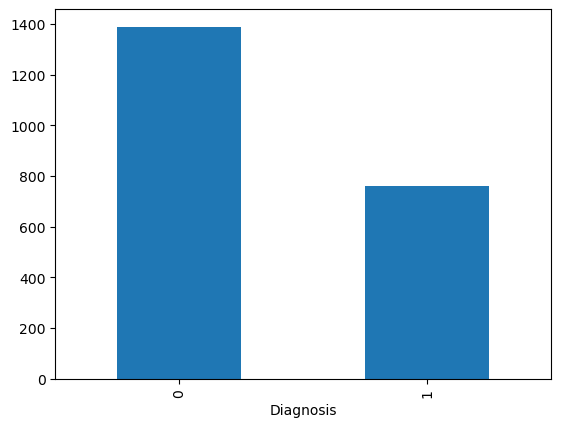

In [6]:
df.Diagnosis.value_counts().plot(kind='bar')

<Axes: xlabel='Age'>

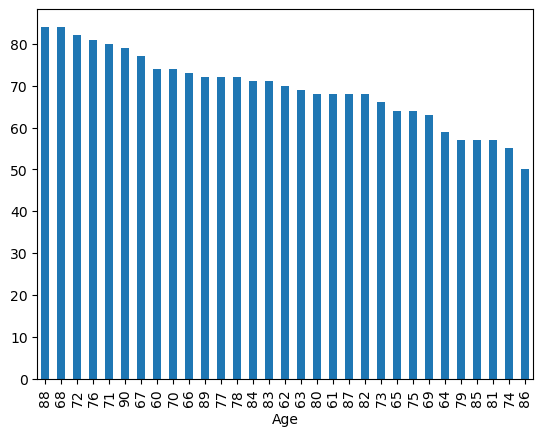

In [13]:
df.Age.value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

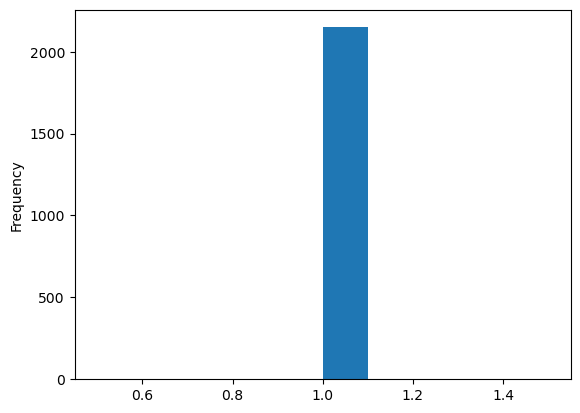

In [24]:
df.ADL.value_counts().plot(kind='hist')

<Axes: xlabel='Disorientation'>

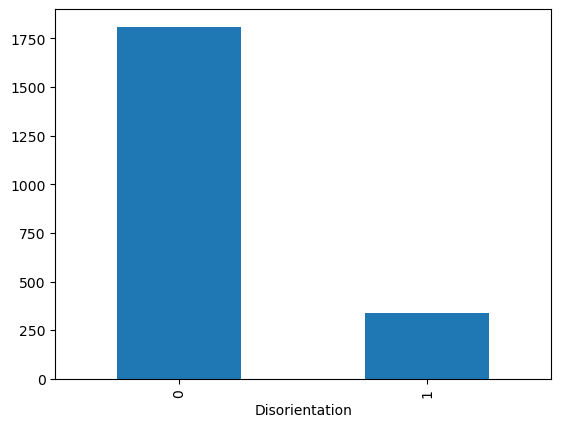

In [26]:
df.Disorientation.value_counts().plot(kind='bar')

<Axes: xlabel='Confusion'>

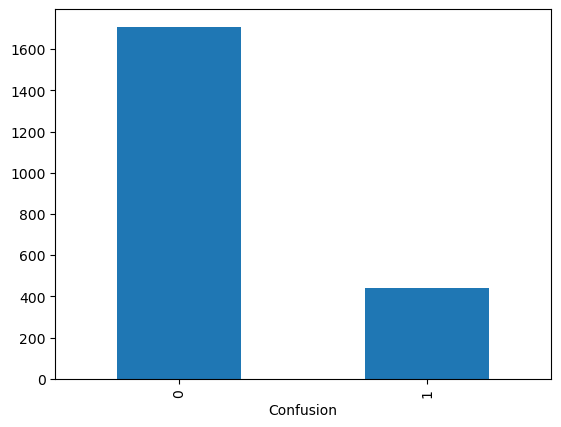

In [27]:
df.Confusion.value_counts().plot(kind='bar')

<Axes: xlabel='Diagnosis'>

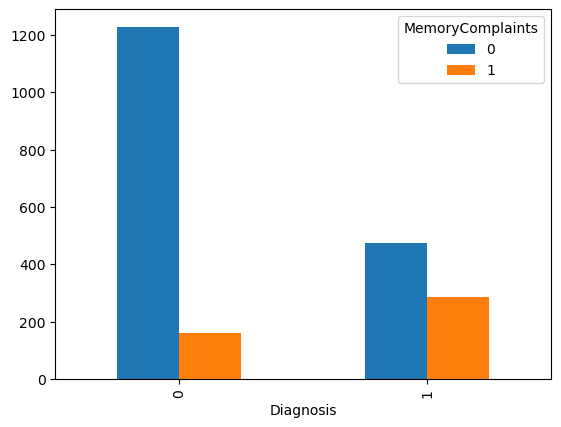

In [377]:
pd.crosstab(df["Diagnosis"],df["MemoryComplaints"]).plot(kind="bar")

<Axes: xlabel='Diagnosis'>

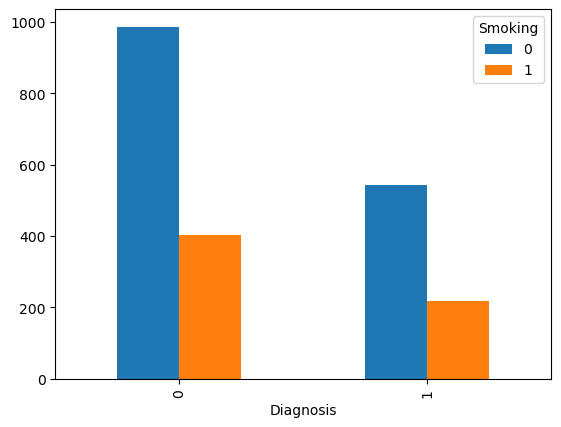

In [378]:

pd.crosstab(df["Diagnosis"],df["Smoking"]).plot(kind="bar")

<Axes: xlabel='Diagnosis'>

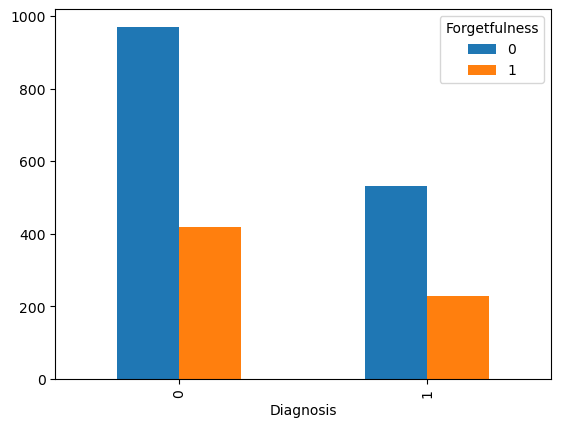

In [379]:

pd.crosstab(df["Diagnosis"],df["Forgetfulness"]).plot(kind="bar")

In [380]:
activity_by_alzheimer = df.groupby('Diagnosis')['PhysicalActivity'].value_counts()
print(activity_by_alzheimer)

Diagnosis  PhysicalActivity
0          0.003616            1
           0.007483            1
           0.009348            1
           0.045405            1
           0.068155            1
                              ..
1          9.931415            1
           9.947910            1
           9.976581            1
           9.984090            1
           9.985069            1
Name: count, Length: 2149, dtype: int64


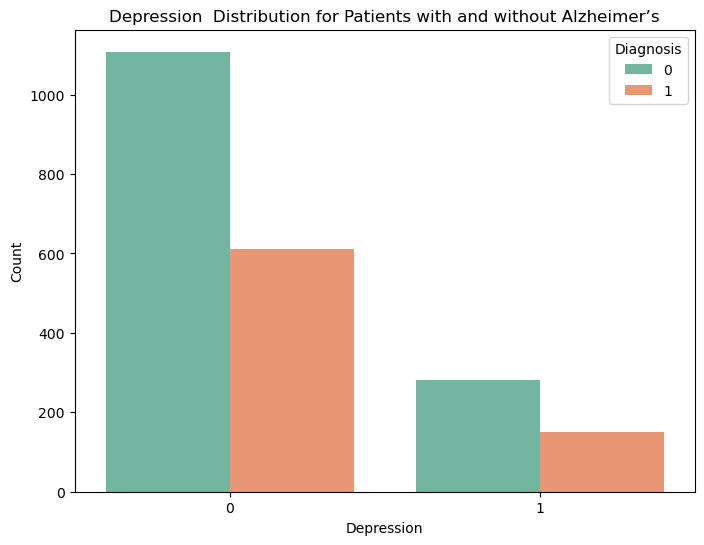

In [381]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Depression', hue='Diagnosis', palette='Set2')
plt.title('Depression  Distribution for Patients with and without Alzheimer’s')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Confusion'>

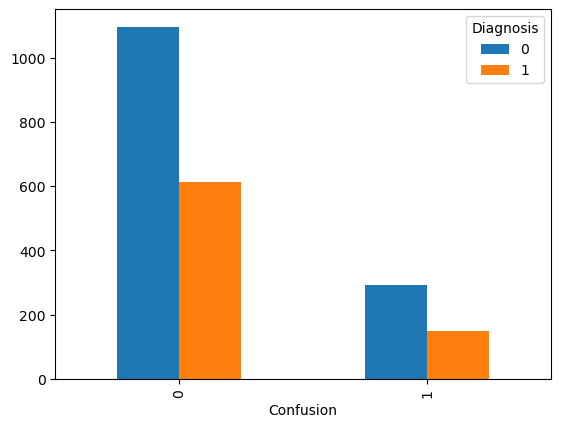

In [382]:
pd.crosstab(df['Confusion'],df['Diagnosis']).plot(kind="bar")

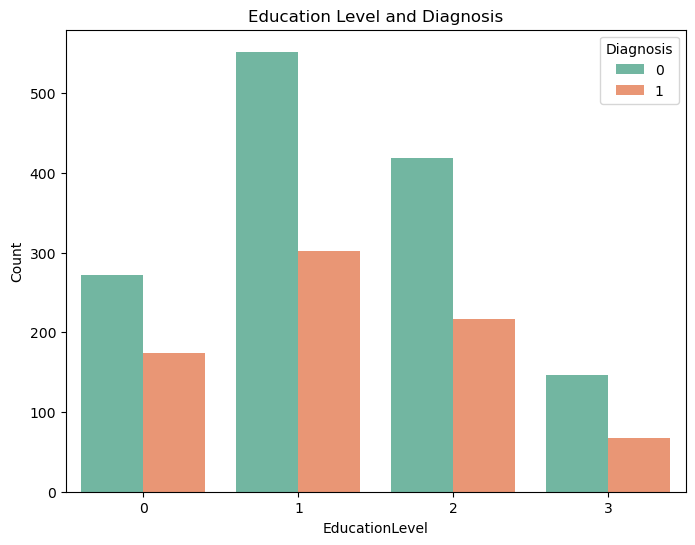

In [383]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EducationLevel', hue='Diagnosis', palette='Set2')
plt.title('Education Level and Diagnosis')
plt.xlabel('EducationLevel')
plt.ylabel('Count')
plt.show()

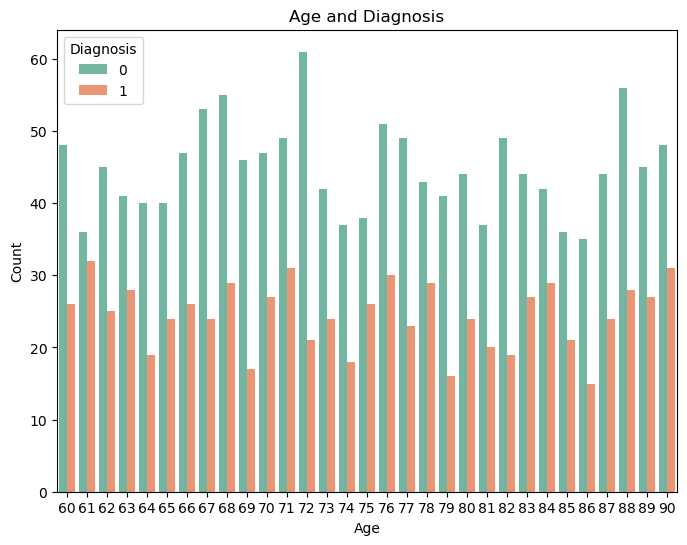

In [384]:
plt.figure(figsize=(8,6))
sns.countplot(data=df , x='Age' , hue='Diagnosis',palette='Set2')
plt.title('Age and Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

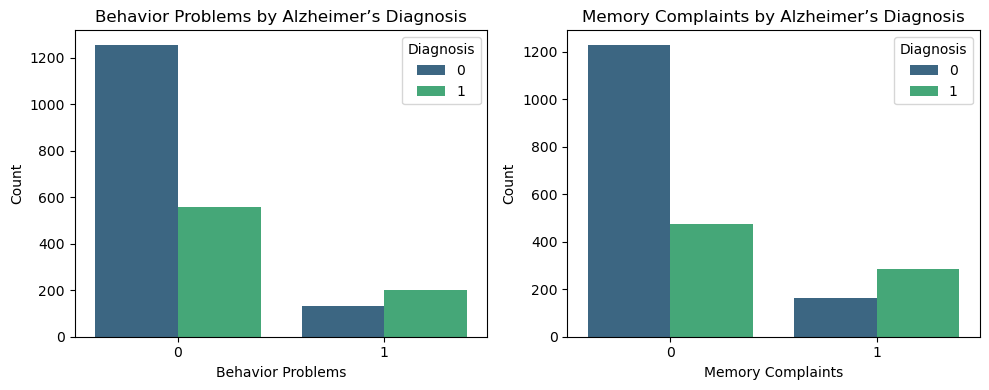

In [385]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.countplot(x='BehavioralProblems', hue='Diagnosis', data=df, palette='viridis')
plt.title('Behavior Problems by Alzheimer’s Diagnosis')
plt.xlabel('Behavior Problems')
plt.ylabel('Count')
plt.legend(title='Diagnosis')

plt.subplot(1,2,2)
sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=df, palette='viridis')
plt.title('Memory Complaints by Alzheimer’s Diagnosis')
plt.xlabel('Memory Complaints')
plt.ylabel('Count')
plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()

<Axes: xlabel='Diagnosis'>

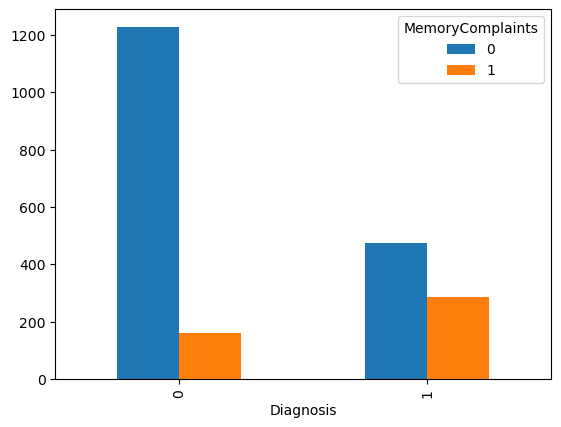

In [386]:
pd.crosstab(df['Diagnosis'], df['MemoryComplaints']).plot(kind='bar')

In [387]:
df.max()

PatientID                          6899
Age                                  90
Gender                                1
Ethnicity                             3
EducationLevel                        3
BMI                           39.992767
Smoking                               1
AlcoholConsumption            19.989293
PhysicalActivity               9.987429
DietQuality                    9.998346
SleepQuality                    9.99984
FamilyHistoryAlzheimers               1
CardiovascularDisease                 1
Diabetes                              1
Depression                            1
HeadInjury                            1
Hypertension                          1
SystolicBP                          179
DiastolicBP                         119
CholesterolTotal             299.993352
CholesterolLDL               199.965665
CholesterolHDL                99.980324
CholesterolTriglycerides     399.941862
MMSE                          29.991381
FunctionalAssessment           9.996467


In [388]:
df.min()

PatientID                          4751
Age                                  60
Gender                                0
Ethnicity                             0
EducationLevel                        0
BMI                           15.008851
Smoking                               0
AlcoholConsumption             0.002003
PhysicalActivity               0.003616
DietQuality                    0.009385
SleepQuality                   4.002629
FamilyHistoryAlzheimers               0
CardiovascularDisease                 0
Diabetes                              0
Depression                            0
HeadInjury                            0
Hypertension                          0
SystolicBP                           90
DiastolicBP                          60
CholesterolTotal             150.093316
CholesterolLDL                50.230707
CholesterolHDL                20.003434
CholesterolTriglycerides      50.407194
MMSE                           0.005312
FunctionalAssessment            0.00046


In [11]:
df.drop(["PatientID","DoctorInCharge"],axis=1,inplace=True)

# Modeling

In [12]:
x=df.drop("Diagnosis",axis=1)
y=df["Diagnosis"]


In [13]:
x

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.93,0,13.30,6.33,1.35,9.03,...,21.46,6.52,0,0,1.73,0,0,0,1,0
1,89,0,0,0,26.83,0,4.54,7.62,0.52,7.15,...,20.61,7.12,0,0,2.59,0,0,0,0,1
2,73,0,3,1,17.80,0,19.56,7.84,1.83,9.67,...,7.36,5.90,0,0,7.12,0,1,0,1,0
3,74,1,0,1,33.80,1,12.21,8.43,7.44,8.39,...,13.99,8.97,0,1,6.48,0,0,0,0,0
4,89,0,0,0,20.72,0,18.45,6.31,0.80,5.60,...,13.52,6.05,0,0,0.01,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.12,0,1.56,4.05,6.56,7.54,...,1.20,0.24,0,0,4.49,1,0,0,0,0
2145,75,0,0,2,17.86,0,18.77,1.36,2.90,8.56,...,6.46,8.69,0,1,9.20,0,0,0,0,0
2146,77,0,0,1,15.48,0,4.59,9.89,8.12,5.77,...,17.01,1.97,0,0,5.04,0,0,0,0,0
2147,78,1,3,1,15.30,0,8.67,6.35,1.26,8.32,...,4.03,5.17,0,0,3.79,0,0,0,0,1


In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 32/32 [00:02<00:00, 12.07it/s]

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387


In [17]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.95     0.95      0.96   
XGBClassifier                      0.95               0.94     0.94      0.95   
BaggingClassifier                  0.94               0.94     0.94      0.94   
RandomForestClassifier             0.93               0.90     0.90      0.92   
AdaBoostClassifier                 0.92               0.90     0.90      0.92   
DecisionTreeClassifier             0.91               0.89     0.89      0.91   
NearestCentroid                    0.83               0.83     0.83      0.83   
BernoulliNB                        0.85               0.82     0.82      0.84   
QuadraticDiscriminantAnalysis      0.83               0.82     0.82      0.83   
ExtraTreesClassifier               0.85               0.82     0.82      0.85   
GaussianNB                  

In [18]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train,y_train)

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released 1 day ago.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9470540375618686

Generation 2 - Current best internal CV score: 0.9470540375618686

Generation 3 - Current best internal CV score: 0.9470540375618686

Generation 4 - Current best internal CV score: 0.9488016136687232

Generation 5 - Current best internal CV score: 0.9511271950640721

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=entropy, max_features=0.55, min_samples_leaf=2, min_samples_split=20, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [19]:
y_pred = tpot.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.9604651162790697

In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.title("🧠 Alzheimer's Disease Prediction")

# Sample dataset
sample_data = {
    "Age": [65, 70, 75, 80, 85],
    "BMI": [22.5, 24.3, 26.1, 27.8, 29.5],
    "PhysicalActivity": [3, 2, 1, 2, 0],
    "MemoryComplaints": [1, 2, 3, 4, 5],
    "Forgetfulness": [2, 3, 4, 5, 5],
    "Diagnosis": [0, 0, 1, 1, 1]
}

df = pd.DataFrame(sample_data)

st.write("### Sample Data Preview:")
st.dataframe(df)

# User input for prediction simulation
st.write("### Enter Patient Data for Prediction")
input_data = {}
cols = st.columns(len(df.columns) - 1)  # Create columns for input fields

for i, col in enumerate(df.columns[:-1]):  # Exclude Diagnosis
    col_mean = float(df[col].mean())
    with cols[i]:
        input_data[col] = st.number_input(f"{col}\n(Mean: {col_mean})", value=col_mean)

if st.button("Predict"):
    # Simple threshold-based prediction (placeholder)
    risk_score = sum(input_data.values()) / len(input_data)  # Average of inputs
    diagnosis = "Alzheimer" if risk_score > df['Diagnosis'].mean() else "No Alzheimer"
    st.write(f"## Prediction: {diagnosis}")

Overwriting app.py
